In [1]:
!git clone https://github.com/kartoone/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 80 (delta 11), reused 5 (delta 1), pack-reused 55
Receiving objects: 100% (80/80), 16.44 MiB | 15.50 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/nn


In [2]:
from network2 import Network, CrossEntropyCost
import mnist_loader
import numpy as np
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
_,_,_,_,weights = net.SGD(training_data, 30, 10, 0.5, evaluation_data=test_data, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Appending weights for epoch 0
Accuracy on evaluation data: 9145 / 10000
Epoch 1 training complete
Appending weights for epoch 1
Accuracy on evaluation data: 9268 / 10000
Epoch 2 training complete
Appending weights for epoch 2
Accuracy on evaluation data: 9330 / 10000
Epoch 3 training complete
Appending weights for epoch 3
Accuracy on evaluation data: 9352 / 10000
Epoch 4 training complete
Appending weights for epoch 4
Accuracy on evaluation data: 9405 / 10000
Epoch 5 training complete
Appending weights for epoch 5
Accuracy on evaluation data: 9413 / 10000
Epoch 6 training complete
Appending weights for epoch 6
Accuracy on evaluation data: 9419 / 10000
Epoch 7 training complete
Appending weights for epoch 7
Accuracy on evaluation data: 9437 / 10000
Epoch 8 training complete
Appending weights for epoch 8
Accuracy on evaluation data: 9445 / 10000
Epoch 9 training complete
Appending weights for epoch 9
Accuracy on evaluation data: 9455 / 10000
Epoch 10 training co

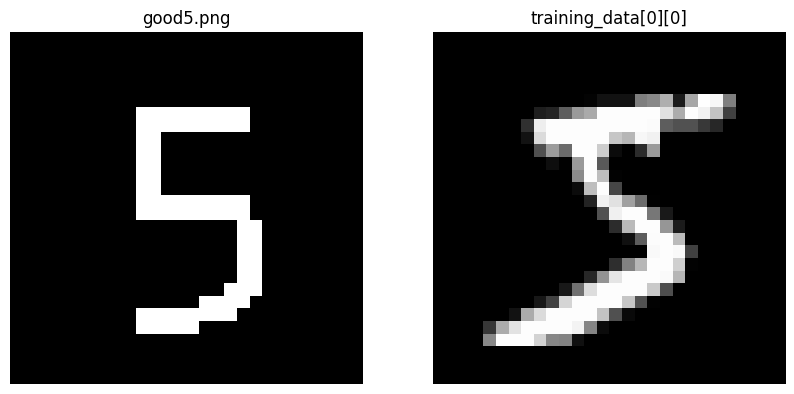

[[4.66790602e-08]
 [1.17063046e-06]
 [1.48450674e-09]
 [4.06924126e-05]
 [5.55786197e-05]
 [9.99701047e-01]
 [4.71972373e-14]
 [6.85515929e-05]
 [3.00254528e-10]
 [1.39910818e-01]]
5
Correct good images: [1, 1, 0, 1, 1, 1, 0, 1, 0, 1]
Correct small images: [0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
Correct large images: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image_path = 'good5.png' # update this path

image = Image.open(image_path).convert('L') # convert image to grayscale

# Convert image to numpy array
image_array = np.array(image)
image_array = image_array/255.0

# Assuming you have two images loaded as numpy arrays
# You can display them side by side like this:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axs[0].imshow(image_array, cmap='gray')
axs[0].set_title(image_path)
axs[0].axis('off') # Hide axis for the first image

# Display the second image
axs[1].imshow(np.reshape(training_data[0][0],(28,28)), cmap='gray')
axs[1].set_title('training_data[0][0]')
axs[1].axis('off') # Hide axis for the second image

plt.show()

a0 = net.feedforward(np.reshape(image_array, (784,1)))
print(a0)
print(np.argmax(a0))

def helper(filename): # helper func returns activation
  image = Image.open(filename).convert('L')
  image_array = np.array(image)
  image_array = image_array/255.0
  return net.feedforward(np.reshape(image_array, (784,1)))

g_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 0 = incorrect, 1 = correct
s_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
l_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(10):
  agood = helper(f"good{i}.png") # count up the good images the nn gets right
  if np.argmax(agood) == i:
    g_list[i] = 1

  asmall = helper(f"small{i}.png") # count up the small images the nn gets right
  if np.argmax(asmall) == i:
    s_list[i] = 1

  alarge = helper(f"large{i}.png") # count up the large images the nn gets right
  if np.argmax(alarge) == i:
    l_list[i] = 1

print(f"Correct good images: {g_list}") # print out the tallies
print(f"Correct small images: {s_list}")
print(f"Correct large images: {l_list}")

#a1 = net.feedforward(training_data[0][0])
#print(a1)

In [5]:
import expand_mnist

Expanding the MNIST training set
Expanding image number 1000
Expanding image number 2000
Expanding image number 3000
Expanding image number 4000
Expanding image number 5000
Expanding image number 6000
Expanding image number 7000
Expanding image number 8000
Expanding image number 9000
Expanding image number 10000
Expanding image number 11000
Expanding image number 12000
Expanding image number 13000
Expanding image number 14000
Expanding image number 15000
Expanding image number 16000
Expanding image number 17000
Expanding image number 18000
Expanding image number 19000
Expanding image number 20000
Expanding image number 21000
Expanding image number 22000
Expanding image number 23000
Expanding image number 24000
Expanding image number 25000
Expanding image number 26000
Expanding image number 27000
Expanding image number 28000
Expanding image number 29000
Expanding image number 30000
Expanding image number 31000
Expanding image number 32000
Expanding image number 33000
Expanding image num

In [6]:
from network2 import Network, CrossEntropyCost
import mnist_loader
import numpy as np
training_data, validation_data, test_data = mnist_loader.load_data_wrapper("mnist_expanded.pkl.gz") # using this expanded
training_data=list(training_data)                                                       # dataset, train new nn "net2"
test_data = list(test_data)
net2 = Network([784, 30, 10], cost=CrossEntropyCost)
net2.large_weight_initializer()
_,_,_,_,weights = net2.SGD(training_data, 30, 10, 0.5, evaluation_data=test_data, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Appending weights for epoch 0
Accuracy on evaluation data: 9394 / 10000
Epoch 1 training complete
Appending weights for epoch 1
Accuracy on evaluation data: 9507 / 10000
Epoch 2 training complete
Appending weights for epoch 2
Accuracy on evaluation data: 9578 / 10000
Epoch 3 training complete
Appending weights for epoch 3
Accuracy on evaluation data: 9587 / 10000
Epoch 4 training complete
Appending weights for epoch 4
Accuracy on evaluation data: 9612 / 10000
Epoch 5 training complete
Appending weights for epoch 5
Accuracy on evaluation data: 9577 / 10000
Epoch 6 training complete
Appending weights for epoch 6
Accuracy on evaluation data: 9645 / 10000
Epoch 7 training complete
Appending weights for epoch 7
Accuracy on evaluation data: 9613 / 10000
Epoch 8 training complete
Appending weights for epoch 8
Accuracy on evaluation data: 9582 / 10000
Epoch 9 training complete
Appending weights for epoch 9
Accuracy on evaluation data: 9594 / 10000
Epoch 10 training co

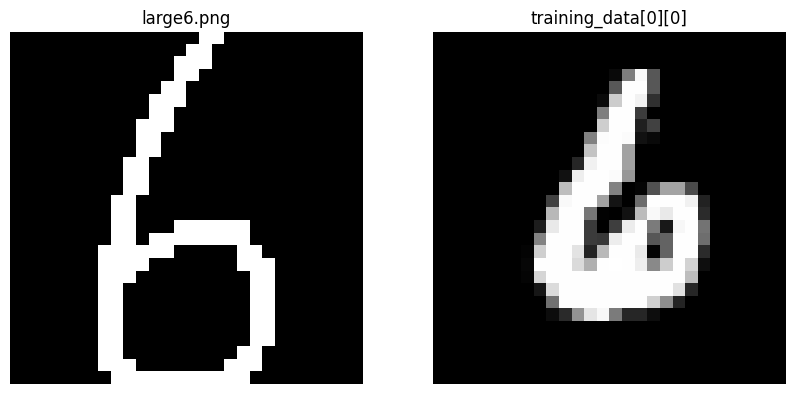

0?: Good: 0 Small: 1 Large: 5 
1?: Good: 1 Small: 1 Large: 8 
2?: Good: 1 Small: 1 Large: 2 
3?: Good: 3 Small: 7 Large: 5 
4?: Good: 4 Small: 1 Large: 7 
5?: Good: 5 Small: 5 Large: 7 
6?: Good: 4 Small: 1 Large: 2 
7?: Good: 7 Small: 1 Large: 5 
8?: Good: 6 Small: 4 Large: 3 
9?: Good: 9 Small: 5 Large: 3 
250k nn correct good images: [1, 1, 0, 1, 1, 1, 0, 1, 0, 1]. 70%!
250k nn correct small images: [0, 1, 0, 0, 0, 1, 0, 0, 0, 0]. 20%!
250k nn correct large images: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]. 10%!


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image_path = 'large6.png'
image = Image.open(image_path).convert('L') # convert image to grayscale
image_array = np.array(image) # Convert image to numpy array
image_array = image_array/255.0

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axs[0].imshow(image_array, cmap='gray')
axs[0].set_title(image_path)
axs[0].axis('off') # Hide axis for the first image

# Display the second image
axs[1].imshow(np.reshape(training_data[0][0],(28,28)), cmap='gray')
axs[1].set_title('training_data[0][0]')
axs[1].axis('off') # Hide axis for the second image

plt.show()

g_list2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 0 = incorrect, 1 = correct
s_list2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
l_list2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

def helper(filename): # not sure if I need to define this again
  image = Image.open(filename).convert('L')
  image_array = np.array(image)
  image_array = image_array/255.0
  return net.feedforward(np.reshape(image_array, (784,1)))

for i in range(10):
  agood = helper(f"good{i}.png") # count up the good images nn2 gets right
  if np.argmax(agood) == i:
    g_list2[i] = 1

  asmall = helper(f"small{i}.png") # same for small images
  if np.argmax(asmall) == i:
    s_list2[i] = 1

  alarge = helper(f"large{i}.png") # and large images
  if np.argmax(alarge) == i:
    l_list2[i] = 1

  print(f"{i}?: Good: {np.argmax(agood)} Small: {np.argmax(asmall)} Large: {np.argmax(alarge)} ")


def percent_helper(list): # takes in a list and returns the nn % accuracy
  correct = 0
  for i in range(10):
    if list[i] == 1:
      correct += 10 # since it's out of 10, just adds 10% for right answers

  return correct

print(f"250k nn correct good images: {g_list2}. {percent_helper(g_list2)}%!") # print out tallies and %s
print(f"250k nn correct small images: {s_list2}. {percent_helper(s_list2)}%!")
print(f"250k nn correct large images: {l_list2}. {percent_helper(l_list2)}%!")